# Algorithm benchmarking


In [1]:
# If pydistsim is not installed and the script is run from docs/notebooks directory
# import sys
# sys.path.append("../../")

# for interactive plots
%matplotlib notebook

from pydistsim.logging import set_log_level, enable_logger
from pydistsim.benchmark import AlgorithmBenchmark
from pydistsim.demo_algorithms.broadcast import Flood
from pydistsim.network.behavior import ExampleProperties

In [2]:
set_log_level("INFO")
enable_logger()

### Set-up the benchmark

- Pass algorithm, network sizes to test and the network behavior.
- Then run the benchmark.


In [3]:
benchmark = AlgorithmBenchmark(
    ((Flood, {"initial_information": "Hello Wold!"}),),
    network_sizes=range(1, 20),  # equivalent to [1, 2, 3, ..., 19]
    network_behavior=ExampleProperties.UnorderedRandomDelayCommunication,  # One can define their own network behavior
)

benchmark.run()

### Automatically generated plots with the results


<IPython.core.display.Javascript object>

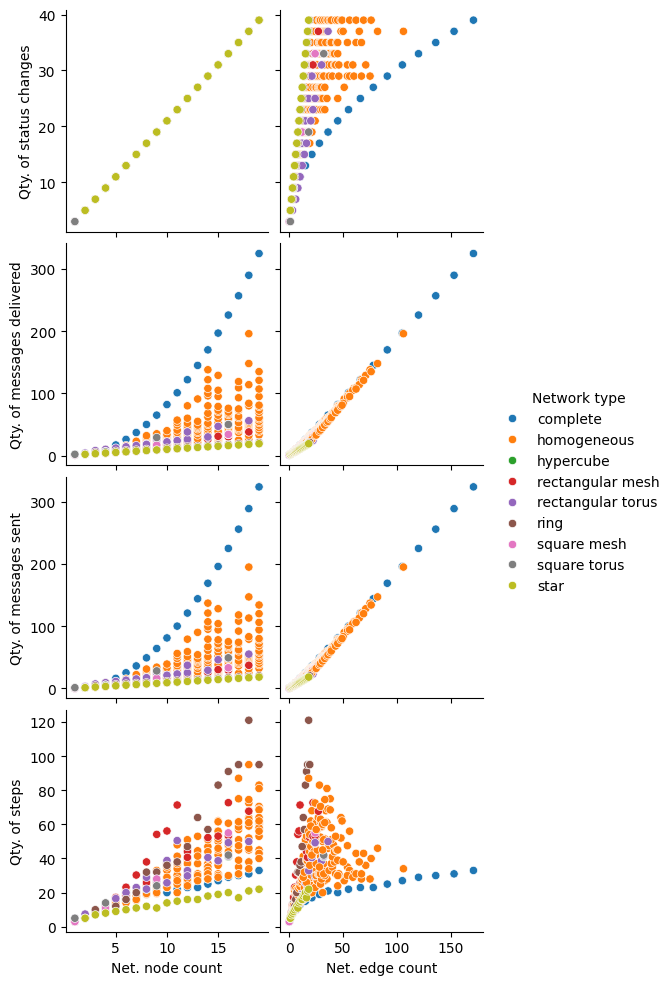

In [10]:
pairgrid = benchmark.plot_analysis()  # Create a plot

pairgrid.figure  # In IPython, this will show the plot

### Get the data as a pandas DataFrame for in-depth analysis


In [5]:
df = benchmark.get_results_dataframe()  # Get the results as a pandas DataFrame

df  # This will display the results as a table

,Net. node count,Net. edge count,Network type,Qty. of messages sent,Qty. of messages delivered,Qty. of status changes,Qty. of steps
0,1,0,complete,0,1,3,3
1,1,0,hypercube,0,1,3,3
2,1,0,ring,0,1,3,3
3,1,0,square mesh,0,1,3,3
4,1,1,square torus,1,2,3,5
...,...,...,...,...,...,...,...
1204,15,22,rectangular mesh,30,31,31,53
1205,15,30,rectangular torus,46,47,31,46
1206,19,29,homogeneous,40,41,39,81
1207,15,22,rectangular mesh,30,31,31,63
